In [2]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
import matplotlib.font_manager as fm
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

W:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
W:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1


X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 42)

nmf = NMF(n_components = 100, random_state = 0)
nmf.fit(X_train)

pca = PCA(n_components = 100, random_state = 0)
pca.fit(X_train)

kmeans = KMeans(n_clusters = 100, random_state = 0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

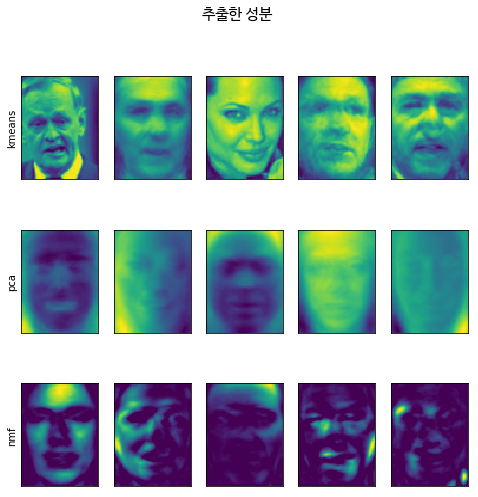

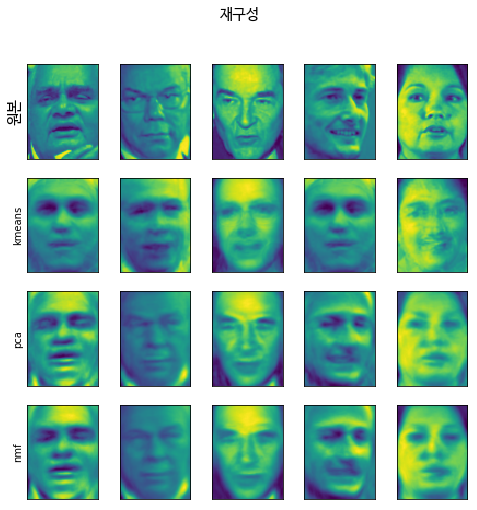

In [5]:
fig, axes = plt.subplots(3, 5 , figsize = (8, 8), subplot_kw = {"xticks": (), "yticks": ()})
fig.suptitle("추출한 성분", fontproperties = fontprop)

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = "viridis")
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw = {"xticks" : (), "yticks": ()}, figsize = (8, 8))
fig.suptitle("재구성", fontproperties = fontprop)

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, 
                                                  X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("원본", fontproperties = fontprop)
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


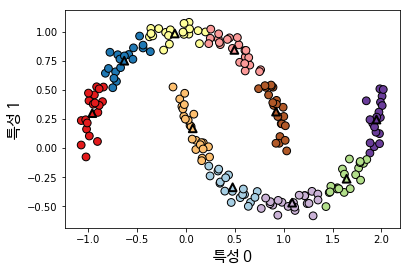

In [12]:
X,y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, s = 60, cmap = "Paired", edgecolors = "black")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 60, marker = "^"
           , c = range(kmeans.n_clusters), linewidth = 2, cmap = "Paired", edgecolors = "black")
plt.xlabel("특성 0", fontproperties = fontprop)
plt.ylabel("특성 1", fontproperties = fontprop)
print("클러스터 레이블:\n", y_pred)